In [3]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 读取文件
sains = pd.read_json('/content/drive/MyDrive/Colab Notebooks/EFIMM0139/sainsburys.json')
tesco = pd.read_json('/content/drive/MyDrive/Colab Notebooks/EFIMM0139/tesco.json')
waitrose = pd.read_json('/content/drive/MyDrive/Colab Notebooks/EFIMM0139/waitrose.json')

# 数据截取

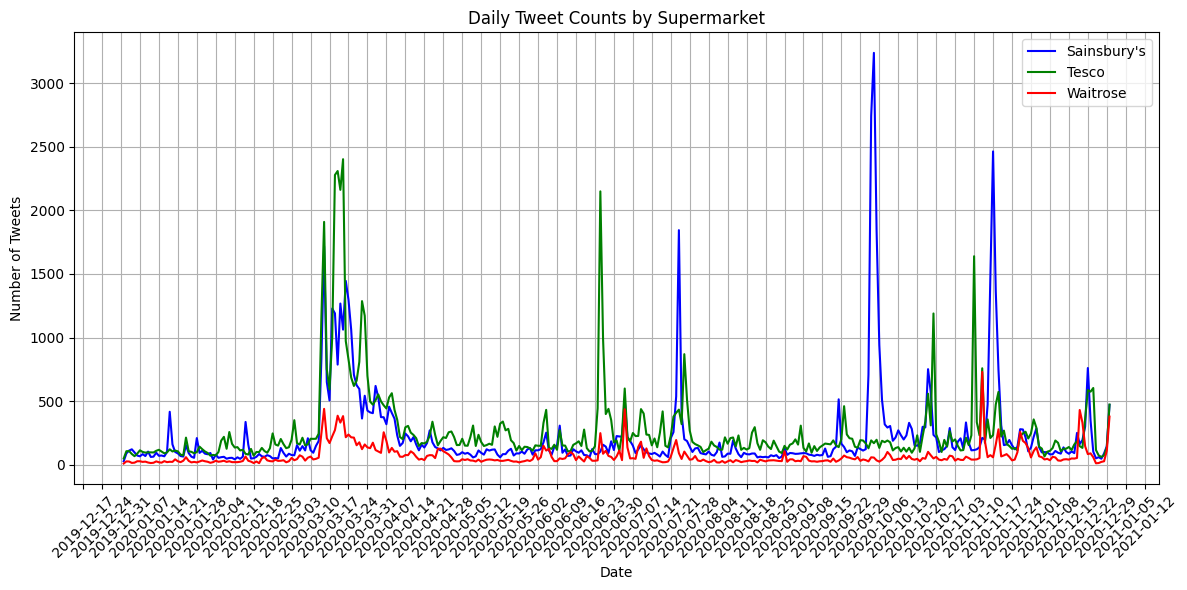

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 定义一个函数来处理数据
def process_data(data):
    data['created_at'] = pd.to_datetime(data['created_at'])
    data['date'] = data['created_at'].dt.date
    return data.groupby('date').size()

# 处理每个数据集
daily_tweets_sains = process_data(sains)
daily_tweets_tesco = process_data(tesco)
daily_tweets_waitrose = process_data(waitrose)

# 绘制图表
plt.figure(figsize=(12, 6))
ax = plt.gca()  # 获取当前轴

# 绘制每个超市的线图
daily_tweets_sains.plot(ax=ax, kind='line', linestyle='-', color='blue', label='Sainsbury\'s')
daily_tweets_tesco.plot(ax=ax, kind='line', linestyle='-', color='green', label='Tesco')
daily_tweets_waitrose.plot(ax=ax, kind='line', linestyle='-', color='red', label='Waitrose')

# 设置日期格式化和间隔
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # 每周显示一次
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 设置日期格式

# 图表标题和标签
plt.title('Daily Tweet Counts by Supermarket')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.xticks(rotation=45)  # 旋转日期标签以便阅读
plt.legend()  # 显示图例
plt.tight_layout()
plt.show()

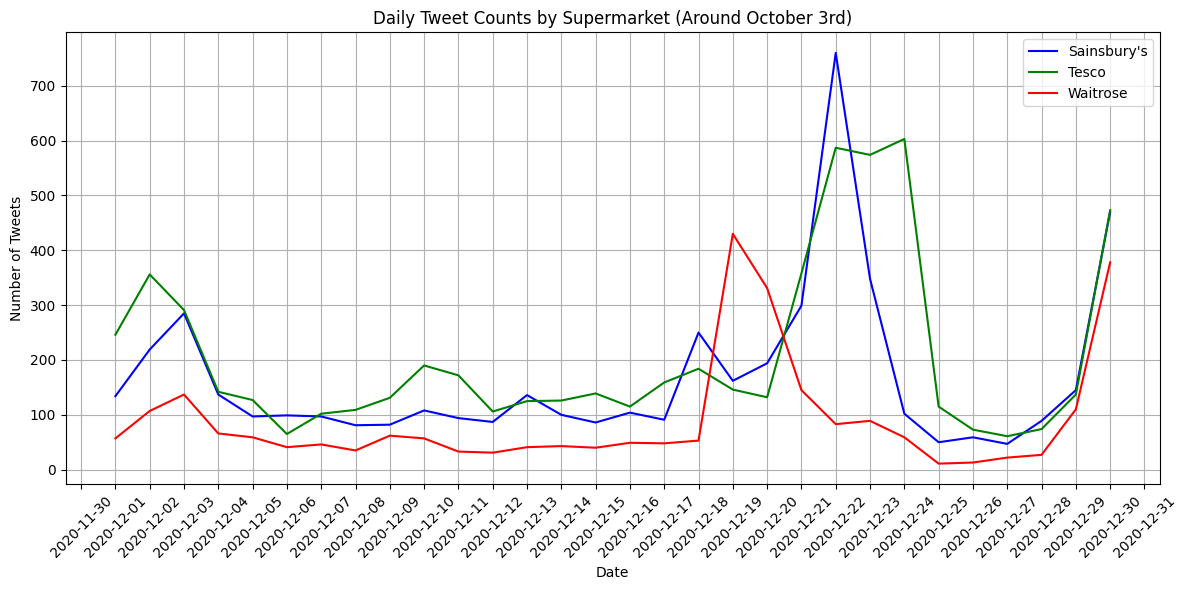

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 定义一个函数来处理数据
def process_data(data, start_date, end_date):
    data['created_at'] = pd.to_datetime(data['created_at'])
    data['date'] = data['created_at'].dt.date
    start_date = pd.to_datetime(start_date).date()  # 转换开始日期为datetime.date对象
    end_date = pd.to_datetime(end_date).date()      # 转换结束日期为datetime.date对象
    filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    return filtered_data

# 设置开始和结束日期
start_date = '2020-12-01'
end_date = '2020-12-30'

# 处理每个数据集
daily_tweets_sains = process_data(sains, start_date, end_date)
daily_tweets_tesco = process_data(tesco, start_date, end_date)
daily_tweets_waitrose = process_data(waitrose, start_date, end_date)

# 绘制图表
plt.figure(figsize=(12, 6))
ax = plt.gca()  # 获取当前轴

# 绘制每个超市的线图
daily_tweets_sains.groupby('date').size().plot(ax=ax, kind='line', linestyle='-', color='blue', label='Sainsbury\'s')
daily_tweets_tesco.groupby('date').size().plot(ax=ax, kind='line', linestyle='-', color='green', label='Tesco')
daily_tweets_waitrose.groupby('date').size().plot(ax=ax, kind='line', linestyle='-', color='red', label='Waitrose')

# 设置日期格式化和间隔
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # 设置每天显示一次
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 设置日期格式


# 图表标题和标签
plt.title('Daily Tweet Counts by Supermarket (Around October 3rd)')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.xticks(rotation=45)  # 旋转日期标签以便阅读
plt.legend()  # 显示图例
plt.tight_layout()
plt.show()

In [365]:
import pandas as pd

# Convert 'created_at' column to datetime if not already
tesco['created_at'] = pd.to_datetime(tesco['created_at'])

# Filter data for the specified date range
start_date = pd.to_datetime('2020-12-01')
end_date = pd.to_datetime('2020-12-29')
tesco_sub = tesco[(tesco['created_at'] >= start_date) & (tesco['created_at'] <= end_date)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [259]:
tesco_sub

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


created_at                   id               id_str  \
4     2020-12-22 11:34:32  1341346379478740993  1341346379478740992   
11    2020-12-14 11:52:49  1338451879420899329  1338451879420899328   
42    2020-12-11 17:43:15  1337452904844812288  1337452904844812288   
90    2020-12-24 19:03:19  1342184097121234948  1342184097121234944   
100   2020-12-10 16:28:19  1337071658096537601  1337071658096537600   
...                   ...                  ...                  ...   
96653 2020-12-12 18:19:04  1337824304558469120  1337824304558469120   
96657 2020-12-22 20:41:06  1341483928188825603  1341483928188825600   
96678 2020-12-28 19:20:45  1343638034525384707  1343638034525384704   
96693 2020-12-23 22:37:55  1341875712626749444  1341875712626749440   
96698 2020-12-22 09:54:47  1341321276833599493  1341321276833599488   

                                                    text display_text_range  \
4      Any comment @Tesco ? British carrots proudly d...            [0, 98]   
11     Christmas Hamper donation today to @ThornhillP...           [0, 140]   
42     Thank you @Tesco for donating Christmas card t...           [0, 140]   
90     RT @jamesmurden: Please note: when ordering sp...               None   
100    @saucy_mahi @Tesco Chipotle sauce\nPeri Peri H...           [19, 98]   
...                                                  ...                ...   
96653  @davie5456 @Morrisons @sainsburys @Tesco They ...          [41, 130]   
96657  @south_eastone @CarolPoyerPeett @sainsburys @T...          [51, 111]   
96678  Getting my first ever home grocery delivery vi...               None   
96693     @jamesmurden @Tesco With me it is with Bananas           [20, 46]   
96698  RT @DCBMEP: I would like an explanation too @T...               None   

                                                  source  truncated  \
4      <a href="http://twitter.com/download/iphone" r...      False   
11     <a href="http://twitter.com/download/iphone" r...       True   
42     <a href="http://twitter.com/download/android" ...       True   
90     <a href="http://twitter.com/download/iphone" r...      False   
100    <a href="https://mobile.twitter.com" rel="nofo...      False   
...                                                  ...        ...   
96653  <a href="http://twitter.com/download/android" ...      False   
96657  <a href="https://mobile.twitter.com" rel="nofo...      False   
96678  <a href="http://twitter.com/download/iphone" r...      False   
96693  <a href="http://twitter.com/#!/download/ipad" ...      False   
96698  <a href="http://twitter.com/download/android" ...      False   

       in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
4                        NaN                        NaN                  NaN   
11                       NaN                        NaN                  NaN   
42                       NaN                        NaN                  NaN   
90                       NaN                        NaN                  NaN   
100             1.330225e+18               1.330225e+18         4.149226e+08   
...                      ...                        ...                  ...   
96653           1.337818e+18               1.337818e+18         3.111429e+09   
96657           1.341483e+18               1.341483e+18         1.004622e+18   
96678                    NaN                        NaN                  NaN   
96693           1.341470e+18               1.341470e+18         1.154598e+08   
96698                    NaN                        NaN                  NaN   

       ...  possibly_sensitive  \
4      ...                 1.0   
11     ...                 0.0   
42     ...                 0.0   
90     ...                 NaN   
100    ...                 NaN   
...    ...                 ...   
96653  ...                 NaN   
96657  ...                 NaN   
96678  ...                 NaN   
96693  ...                 NaN   
96698  ...               

In [207]:
tesco_sub.to_csv('tesco_sub.csv', index=False)  # Save as CSV file without index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 清洗

In [342]:
# 检查是否存在缺失值
missing_values = tesco_sub.isnull().sum()
print(missing_values)

created_at                      0
id                              0
id_str                          0
text                            0
display_text_range           2526
source                          0
truncated                       0
in_reply_to_status_id        3099
in_reply_to_status_id_str    3099
in_reply_to_user_id          2504
in_reply_to_user_id_str      2504
in_reply_to_screen_name      2547
user                            0
geo                          5601
coordinates                  5601
place                        5425
contributors                 5608
is_quote_status                 0
quote_count                     0
reply_count                     0
retweet_count                   0
favorite_count                  0
entities                        0
favorited                       0
retweeted                       0
filter_level                    0
lang                            0
matching_rules                  0
possibly_sensitive           4624
extended_tweet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [366]:
tesco_sub = tesco_sub[['text']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [344]:
tesco_sub

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text
4      Any comment @Tesco ? British carrots proudly d...
11     Christmas Hamper donation today to @ThornhillP...
42     Thank you @Tesco for donating Christmas card t...
90     RT @jamesmurden: Please note: when ordering sp...
100    @saucy_mahi @Tesco Chipotle sauce\nPeri Peri H...
...                                                  ...
96653  @davie5456 @Morrisons @sainsburys @Tesco They ...
96657  @south_eastone @CarolPoyerPeett @sainsburys @T...
96678  Getting my first ever home grocery delivery vi...
96693     @jamesmurden @Tesco With me it is with Bananas
96698  RT @DCBMEP: I would like an explanation too @T...

[5608 rows x 1 columns]

In [367]:
# 去除重复评论
tesco_sub.drop_duplicates(subset='text', inplace=True)
tesco_sub

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text
4      Any comment @Tesco ? British carrots proudly d...
11     Christmas Hamper donation today to @ThornhillP...
42     Thank you @Tesco for donating Christmas card t...
90     RT @jamesmurden: Please note: when ordering sp...
100    @saucy_mahi @Tesco Chipotle sauce\nPeri Peri H...
...                                                  ...
96642  @jamesmurden @Tesco One brussel sprout is prob...
96653  @davie5456 @Morrisons @sainsburys @Tesco They ...
96657  @south_eastone @CarolPoyerPeett @sainsburys @T...
96678  Getting my first ever home grocery delivery vi...
96693     @jamesmurden @Tesco With me it is with Bananas

[4408 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [252]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
pip install text_preprocessing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [368]:
from text_preprocessing import preprocess_text
from text_preprocessing import to_lower, remove_email, remove_url, remove_punctuation

preprocess_functions = [to_lower, remove_email, remove_url, remove_punctuation]

# Define a function that applies all preprocessing functions to a text
def apply_preprocessing(text):
    for function in preprocess_functions:
        text = function(text)
    return text

# Apply the preprocessing function to each text entry in the DataFrame
tesco_sub['text'] = tesco_sub['text'].apply(apply_preprocessing)

# Display the processed text column
tesco_sub['text']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4        any comment tesco  british carrots proudly dis...
11       christmas hamper donation today to thornhillps...
42       thank you tesco for donating christmas card to...
90       rt jamesmurden please note when ordering sprou...
100      saucymahi tesco chipotle sauce\nperi peri hot ...
                               ...                        
96642    jamesmurden tesco one brussel sprout is probab...
96653    davie5456 morrisons sainsburys tesco they make...
96657    southeastone carolpoyerpeett sainsburys tesco ...
96678    getting my first ever home grocery delivery vi...
96693         jamesmurden tesco with me it is with bananas
Name: text, Length: 4408, dtype: object

In [369]:
# Remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
tesco_sub['text'] = tesco_sub['text'].apply(lambda x: remove_numbers(x))

tesco_sub

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text
4      any comment tesco  british carrots proudly dis...
11     christmas hamper donation today to thornhillps...
42     thank you tesco for donating christmas card to...
90     rt jamesmurden please note when ordering sprou...
100    saucymahi tesco chipotle sauce\nperi peri hot ...
...                                                  ...
96642  jamesmurden tesco one brussel sprout is probab...
96653  davie morrisons sainsburys tesco they make out...
96657  southeastone carolpoyerpeett sainsburys tesco ...
96678  getting my first ever home grocery delivery vi...
96693       jamesmurden tesco with me it is with bananas

[4408 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [375]:
# Remove punctuations

def remove_punctuations(data):
   return re.sub(r'[^\w\s]', '', data)

tesco_sub['text']= tesco_sub['text'].apply(lambda x: remove_punctuations(x))
tesco_sub

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text
4      ani comment tesco british carrot proudli displ...
11     christma hamper donat today thornhillp tesco d...
42     thank tesco donat christma card send local car...
90     rt jamesmurden pleas note order sprout tesco o...
100    saucymahi tesco chipotl sauc peri peri hot sau...
...                                                  ...
96642  jamesmurden tesco one brussel sprout probabl m...
96653  davi morrison sainsburi tesco make staff favou...
96657  southeaston carolpoyerpeett sainsburi tesco ag...
96678  get first ever home groceri deliveri via tesco...
96693                           jamesmurden tesco banana

[4408 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [376]:
tesco_sub

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text
4      ani comment tesco british carrot proudli displ...
11     christma hamper donat today thornhillp tesco d...
42     thank tesco donat christma card send local car...
90     rt jamesmurden pleas note order sprout tesco o...
100    saucymahi tesco chipotl sauc peri peri hot sau...
...                                                  ...
96642  jamesmurden tesco one brussel sprout probabl m...
96653  davi morrison sainsburi tesco make staff favou...
96657  southeaston carolpoyerpeett sainsburi tesco ag...
96678  get first ever home groceri deliveri via tesco...
96693                           jamesmurden tesco banana

[4408 rows x 1 columns]

In [377]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
tesco_sub['text'] = tesco_sub['text'].apply(lambda x: stemming_on_text(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [378]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    # 确保数据是字符串
    if isinstance(data, str):
        # 应用词干分析
        text = [st.stem(word) for word in data.split()]
        return ' '.join(text)
    else:
        # 如果数据不是字符串，返回空字符串
        return ""
# 应用词干提取函数，同时处理空值和非字符串数据
tesco_sub['text'] = tesco_sub['text'].apply(lambda x: stemming_on_text(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [379]:
tesco_sub['text']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4        ani comment tesco british carrot proudli displ...
11       christma hamper donat today thornhillp tesco d...
42       thank tesco donat christma card send local car...
90       rt jamesmurden plea note order sprout tesco on...
100      saucymahi tesco chipotl sauc peri peri hot sau...
                               ...                        
96642    jamesmurden tesco one brussel sprout probabl m...
96653    davi morrison sainsburi tesco make staff favou...
96657    southeaston carolpoyerpeett sainsburi tesco ag...
96678    get first ever home groceri deliveri via tesco...
96693                             jamesmurden tesco banana
Name: text, Length: 4408, dtype: object

In [380]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
tesco_sub['text'] = tesco_sub['text'].apply(lambda text: cleaning_stopwords(text))
tesco_sub

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text
4      ani comment tesco british carrot proudli displ...
11     christma hamper donat today thornhillp tesco d...
42     thank tesco donat christma card send local car...
90     rt jamesmurden plea note order sprout tesco on...
100    saucymahi tesco chipotl sauc peri peri hot sau...
...                                                  ...
96642  jamesmurden tesco one brussel sprout probabl m...
96653  davi morrison sainsburi tesco make staff favou...
96657  southeaston carolpoyerpeett sainsburi tesco ag...
96678  get first ever home groceri deliveri via tesco...
96693                           jamesmurden tesco banana

[4408 rows x 1 columns]

In [381]:
tesco_sub.to_csv('/content/drive/MyDrive/Colab Notebooks/EFIMM0139/tesco_sub.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 情绪分析

In [120]:
!pip install vaderSentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [382]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 初始化 VADER 分析器
analyzer = SentimentIntensityAnalyzer()

# 应用 VADER 分析到每条文本上，获取综合得分
tesco_sub['compound'] = tesco_sub['text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# 查看前几行数据确认情绪得分列已添加
print(tesco_sub[['text', 'compound']].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                  text  compound
4    ani comment tesco british carrot proudli displ...    0.0000
11   christma hamper donat today thornhillp tesco d...    0.7096
42   thank tesco donat christma card send local car...    0.6908
90   rt jamesmurden plea note order sprout tesco on...    0.3612
100  saucymahi tesco chipotl sauc peri peri hot sau...    0.0000


In [383]:
tesco_new = pd.DataFrame({'text':tesco_sub['text'], 'sentiment_score':tesco_sub['compound']})
tesco_new

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text  sentiment_score
4      ani comment tesco british carrot proudli displ...           0.0000
11     christma hamper donat today thornhillp tesco d...           0.7096
42     thank tesco donat christma card send local car...           0.6908
90     rt jamesmurden plea note order sprout tesco on...           0.3612
100    saucymahi tesco chipotl sauc peri peri hot sau...           0.0000
...                                                  ...              ...
96642  jamesmurden tesco one brussel sprout probabl m...           0.5106
96653  davi morrison sainsburi tesco make staff favou...          -0.0516
96657  southeaston carolpoyerpeett sainsburi tesco ag...          -0.6597
96678  get first ever home groceri deliveri via tesco...           0.0000
96693                           jamesmurden tesco banana           0.0000

[4408 rows x 2 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


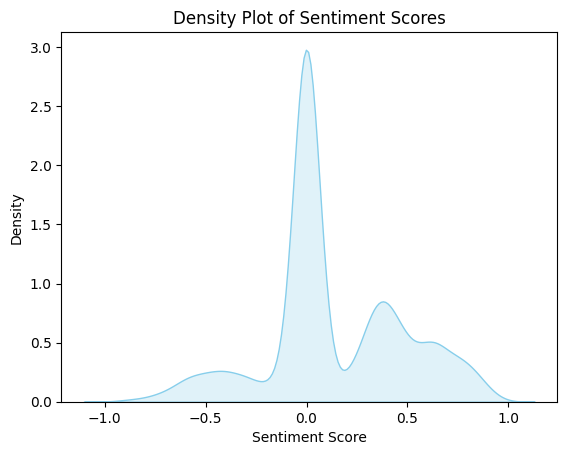

In [384]:
import seaborn as sns
sentiment_score = tesco_new['sentiment_score']
# 绘制密度图
sns.kdeplot(sentiment_score, color='skyblue', fill=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Scores')
plt.show()

In [385]:
# 转换为 pandas 的 Series 对象
sentiment_series = pd.Series(sentiment_score)
# 计算描述性统计量
stats = sentiment_series.describe()
stats

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    4408.000000
mean        0.132772
std         0.342838
min        -0.911800
25%         0.000000
50%         0.000000
75%         0.381800
max         0.939300
Name: sentiment_score, dtype: float64

In [388]:
# 定义情绪评分的阈值
POSITIVE_THRESHOLD = 0.1
NEGATIVE_THRESHOLD = -0.1

# 根据阈值将情绪得分分别为积极、中性和消极
def classify_sentiment(score):
    if score > POSITIVE_THRESHOLD:
        return 'positive'
    elif score < NEGATIVE_THRESHOLD:
        return 'negative'
    else:
        return 'neutral'

tesco_new['Sentiment'] = tesco_new['sentiment_score'].apply(classify_sentiment)
tesco_new.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text  sentiment_score  \
4    ani comment tesco british carrot proudli displ...           0.0000   
11   christma hamper donat today thornhillp tesco d...           0.7096   
42   thank tesco donat christma card send local car...           0.6908   
90   rt jamesmurden plea note order sprout tesco on...           0.3612   
100  saucymahi tesco chipotl sauc peri peri hot sau...           0.0000   

    Sentiment  
4     neutral  
11   positive  
42   positive  
90   positive  
100   neutral

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Sentiment Data Distribution')

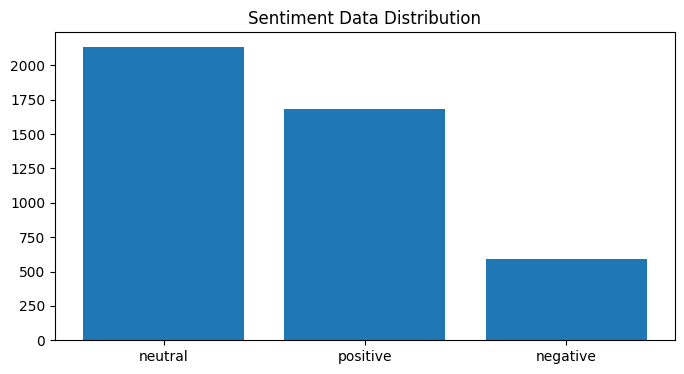

In [389]:
val_count = tesco_new.Sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


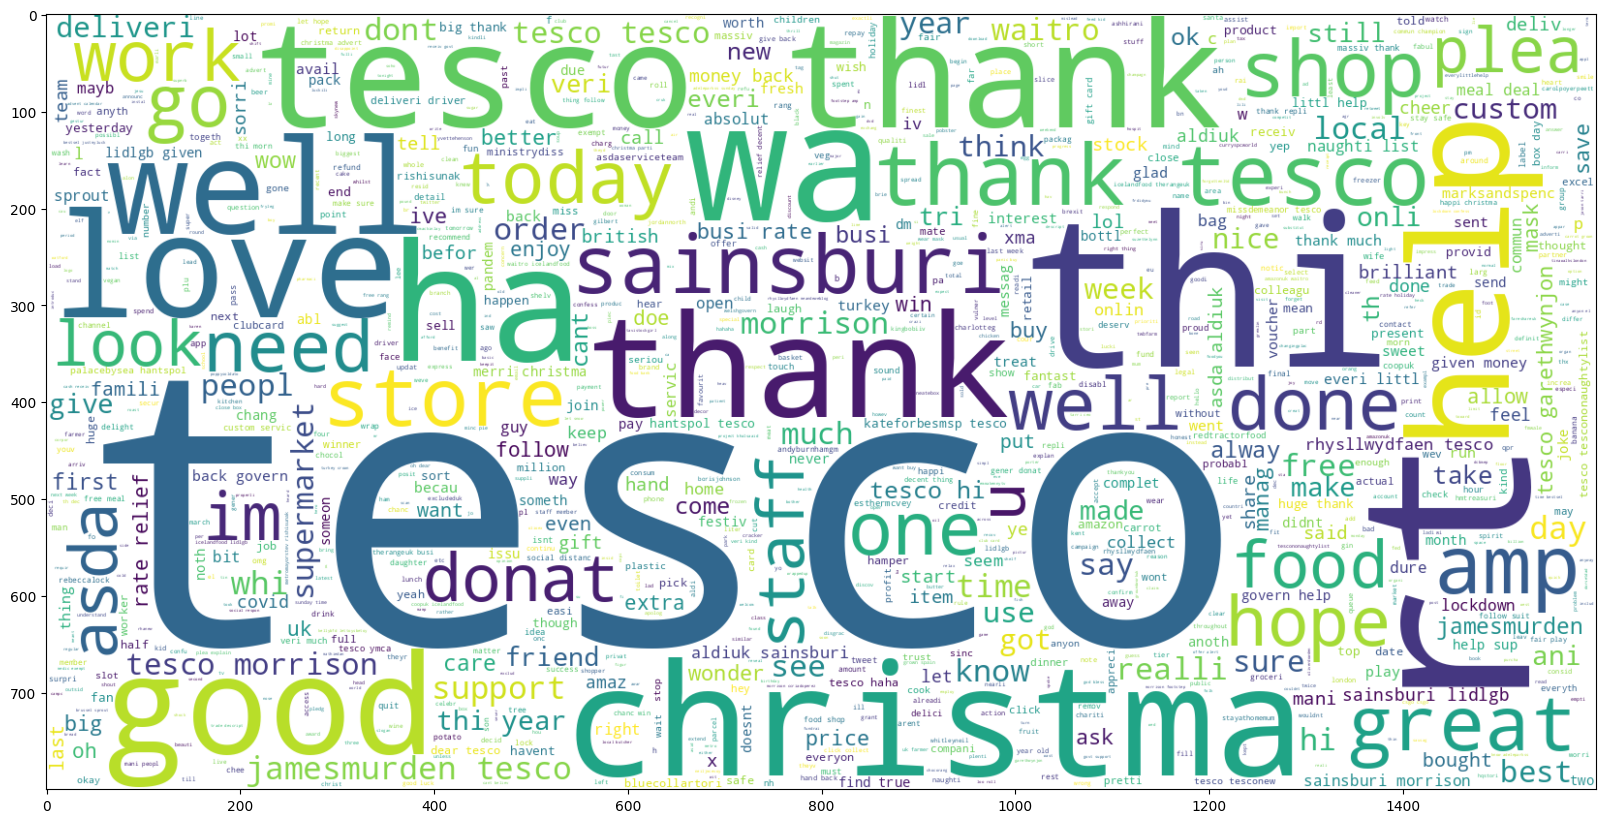

In [390]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tesco_new[tesco_new.Sentiment == 'positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


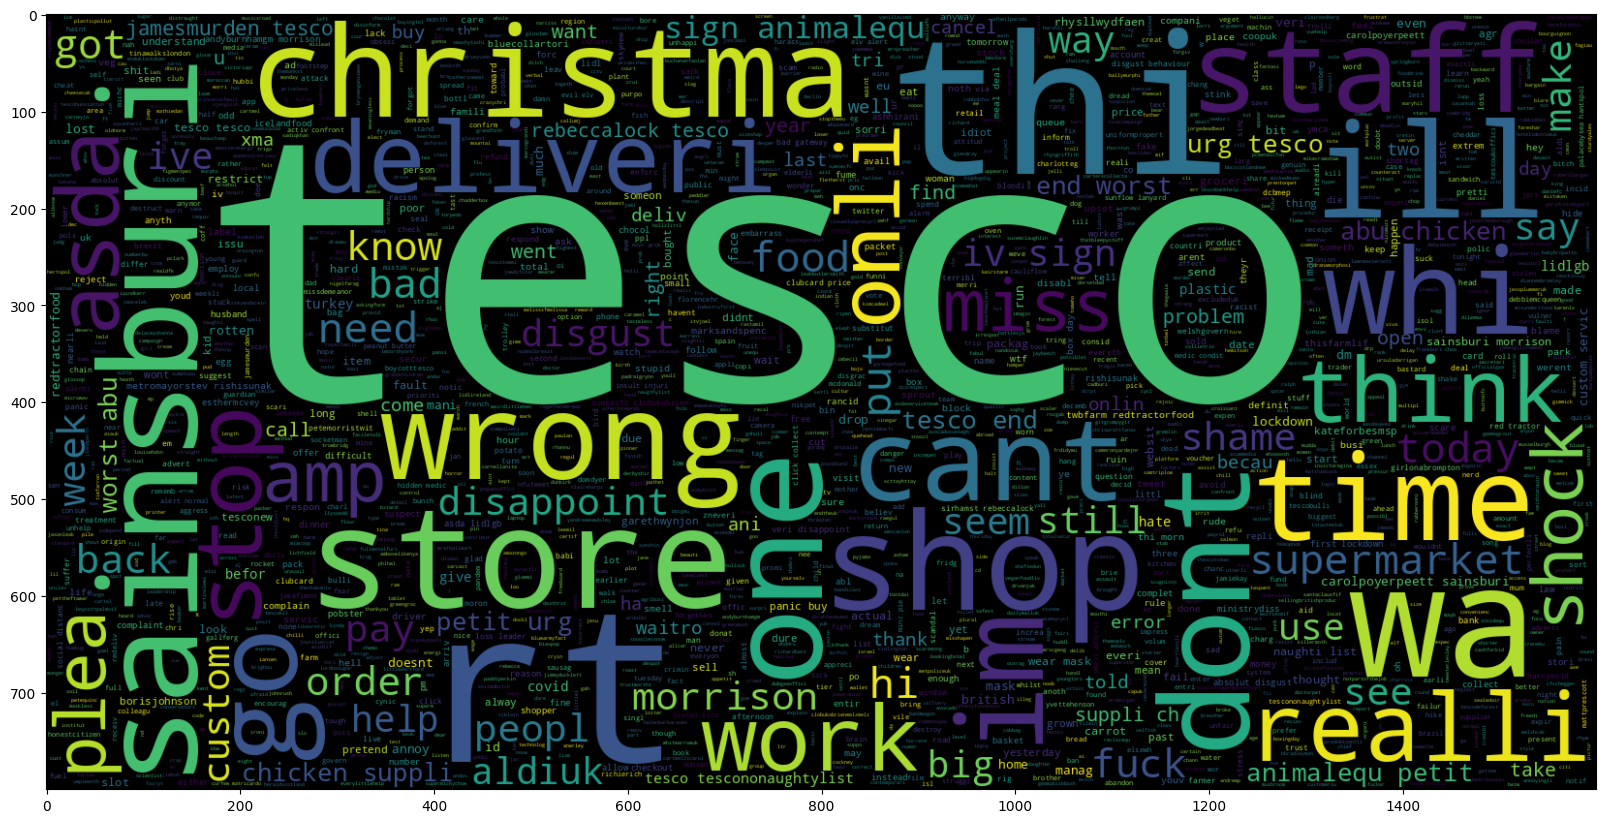

In [391]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tesco_new[tesco_new.Sentiment == 'negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tesco_new[tesco_new.Sentiment == 'neutral'].text))
plt.imshow(wc , interpolation = 'bilinear')

# 二筛

In [392]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
new_stopwords = ["rt",'wa','ha','thi','x','amp']#thi is this
stop_words.extend(new_stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
tesco_new['text'] = tesco_new['text'].apply(lambda text: cleaning_stopwords(text))
tesco_new.to_csv('tesco.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


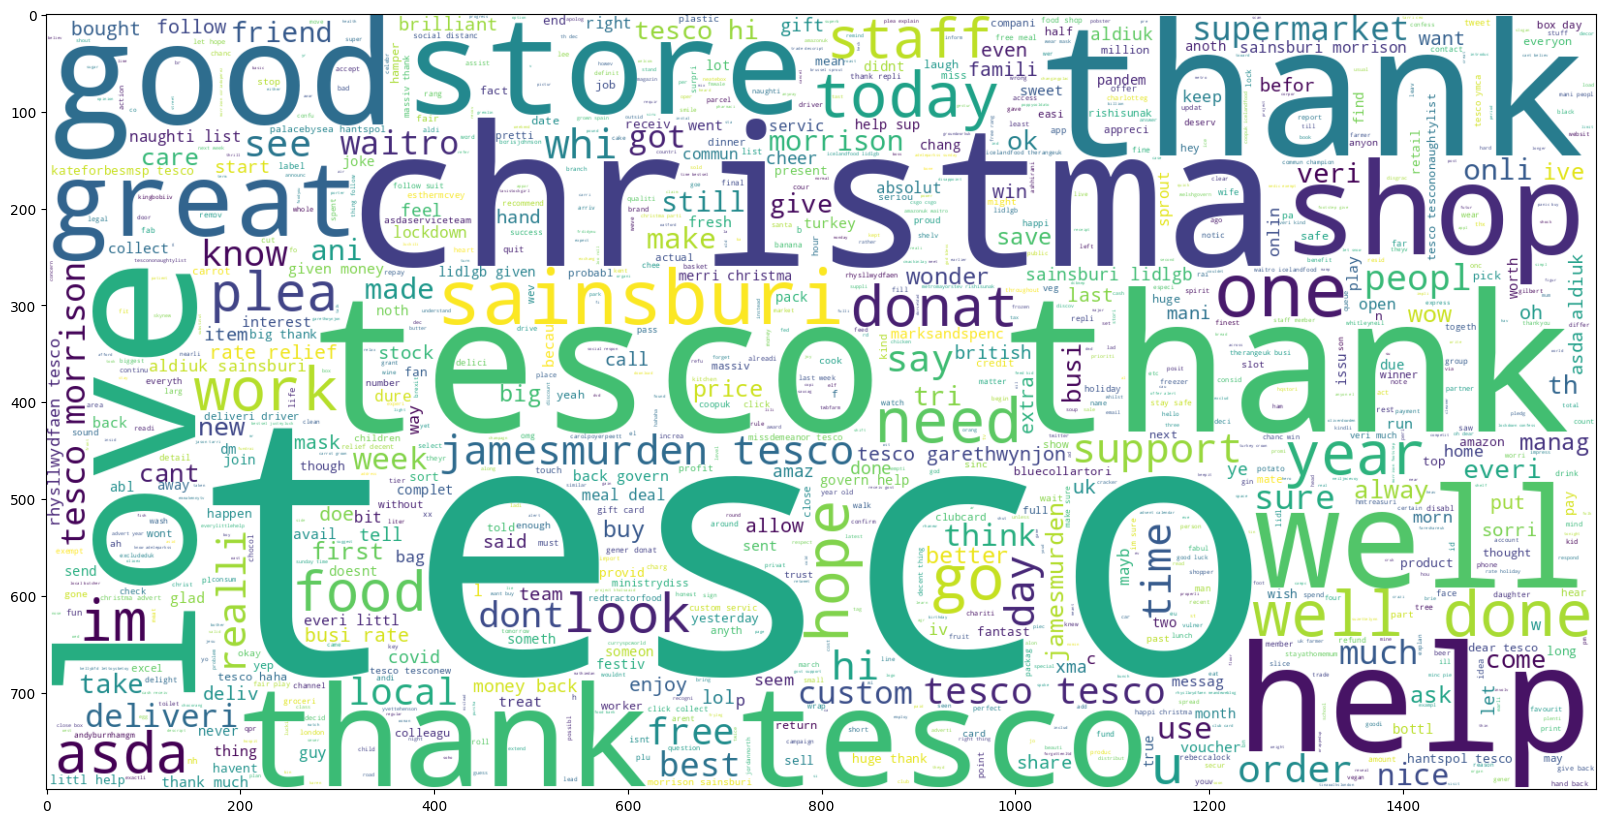

In [393]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tesco_new[tesco_new.Sentiment == 'positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


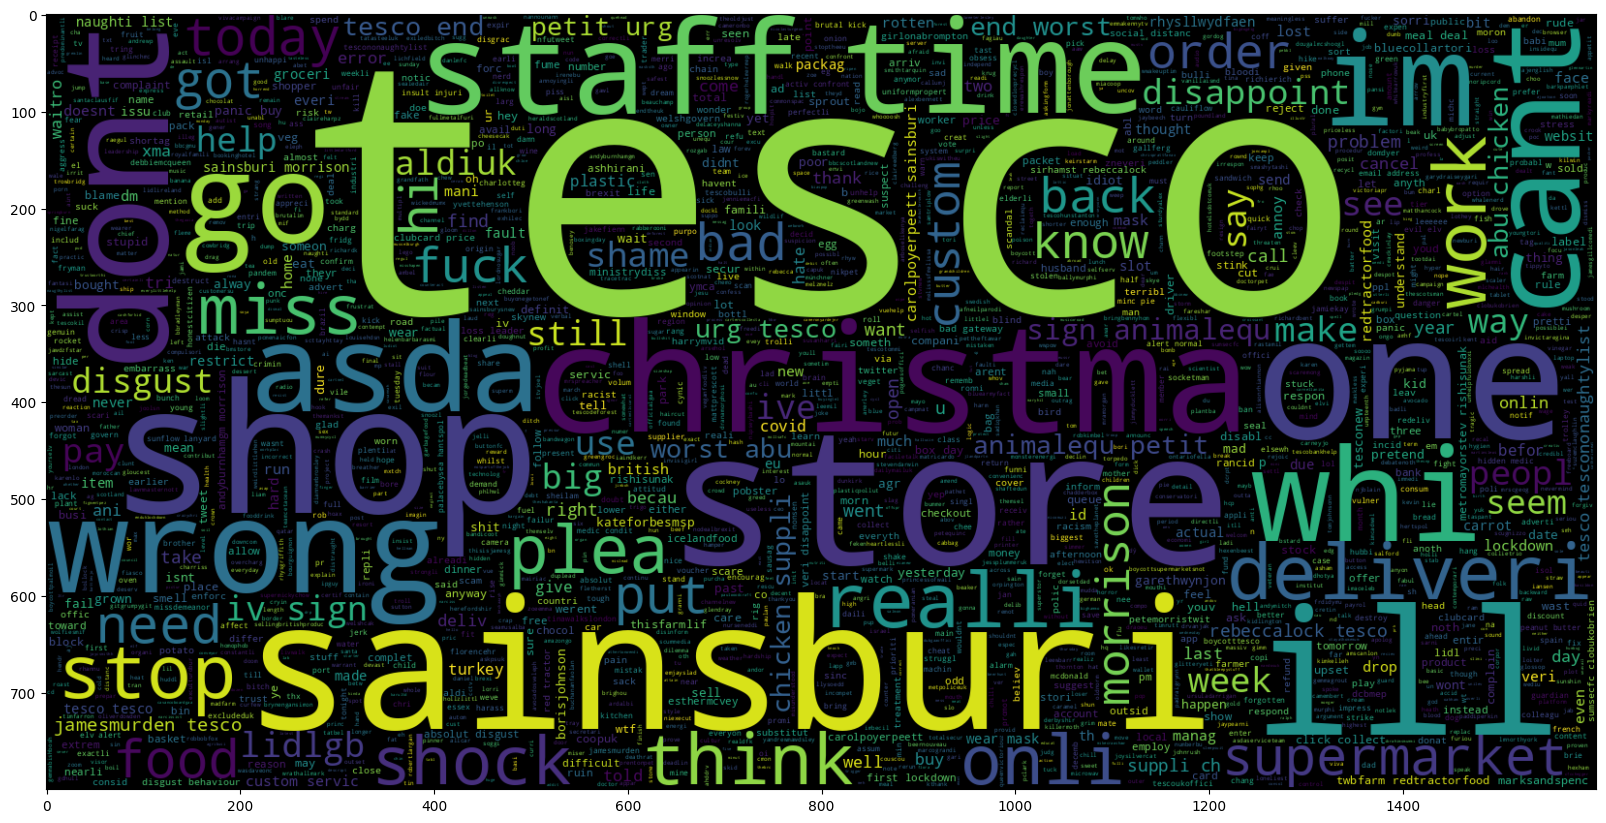

In [394]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tesco_new[tesco_new.Sentiment == 'negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

测试

In [395]:
# Separating the 70% data for training data and 30% for testing data
trainsize = 0.7
X = tesco_new['text']
y = tesco_new['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1-trainsize,
                                         random_state=123) # Splits Dataset into Training and Testing set

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [396]:
# TfidfVectorizer.fit_transform is used to create vocabulary from the training dataset
# TfidfVectorizer.transform is used to map that vocabulary to test dataset so that the number of features
# in test data remain same as train data.
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(ngram_range=(2,2), max_features=500000)
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training Accuracy : 0.9899513776337115
Test Accuracy : 0.6122448979591837
[[ 17 121  44]
 [  4 536  96]
 [  6 242 257]]


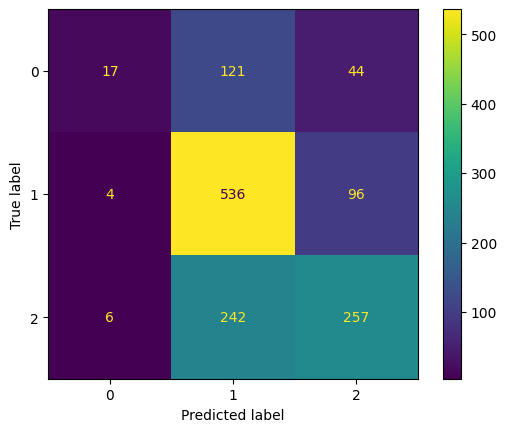

In [397]:
model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)

y_pred = model_NB.predict(X_test)

print("Training Accuracy :", model_NB.score(X_train, y_train))
print("Test Accuracy :", model_NB.score(X_test, y_test))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training Accuracy : 0.9987034035656402
Test Accuracy : 0.6130007558578987
[[  8 150  24]
 [  1 606  29]
 [  1 307 197]]


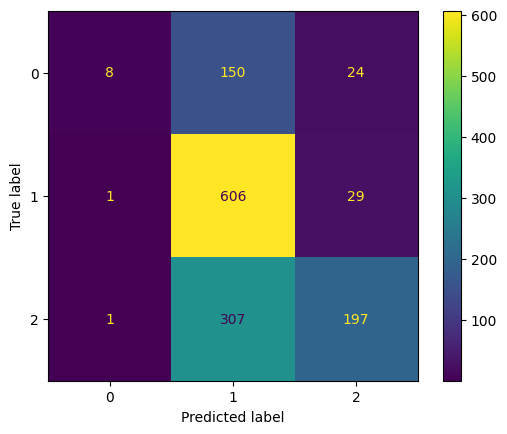

In [398]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Test Accuracy :", model.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#LDA

In [71]:
!pip install contractions

In [73]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.3 MB/s eta 0:00:00


In [150]:
import pandas as pd
import unicodedata
import re
import contractions
import string
#Gensim
import gensim
import gensim.corpora as corpora
#spacy
import spacy
#vis
import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [409]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
new_stopwords = ['tesco']
stop_words.extend(new_stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
tesco_new['text'] = tesco_new['text'].apply(lambda text: cleaning_stopwords(text))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [410]:
def generate_tokens(tweet):
    words=[]
    for word in tweet.split(' '):
    # using the if condition because we introduced extra spaces during text cleaning
         # if word != '' and word not in stop_words:
        if word!='':
           words.append(word)
    return words

tesco_new['tokens']=tesco_new.text.apply(generate_tokens)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [411]:
tesco_new

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text  sentiment_score  \
4      ani comment british carrot proudli display uni...           0.0000   
11     christma hamper donat today thornhillp dunstab...           0.7096   
42     thank donat christma card send local care home...           0.6908   
90     jamesmurden plea note order sprout onlin quant...           0.3612   
100    saucymahi chipotl sauc peri peri hot sauc caro...           0.0000   
...                                                  ...              ...   
96642  jamesmurden one brussel sprout probabl mani th...           0.5106   
96653  davi morrison sainsburi make staff favour make...          -0.0516   
96657  southeaston carolpoyerpeett sainsburi agr andi...          -0.6597   
96678  get first ever home groceri deliveri via im we...           0.0000   
96693                                 jamesmurden banana           0.0000   

      Sentiment                                             tokens  
4       neutral  [ani, comment, british, carrot, proudli, displ...  
11     positive  [christma, hamper, donat, today, thornhillp, d...  
42     positive  [thank, donat, christma, card, send, local, ca...  
90     positive  [jamesmurden, plea, note, order, sprout, onlin...  
100     neutral  [saucymahi, chipotl, sauc, peri, peri, hot, sa...  
...         ...                                                ...  
96642  positive  [jamesmurden, one, brussel, sprout, probabl, m...  
96653   neutral  [davi, morrison, sainsburi, make, staff, favou...  
96657  negative  [southeaston, carolpoyerpeett, sainsburi, agr,...  
96678   neutral  [get, first, ever, home, groceri, deliveri, vi...  
96693   neutral                              [jamesmurden, banana]  

[4408 rows x 4 columns]

In [412]:
def create_dictionary(words):
    return corpora.Dictionary(words)
id2word=create_dictionary(tesco_new['tokens'])
print(id2word)

Dictionary<8173 unique tokens: ['ani', 'british', 'carrot', 'comment', 'display']...>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [413]:
def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(tesco_new['tokens'],id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [422]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=7,random_state=100,
                                             )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [423]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.014528  0.040725       1        1  15.420240
2     -0.065367 -0.188205       2        1  15.141396
6     -0.168315 -0.064951       3        1  14.883621
0     -0.135772  0.139092       4        1  14.847472
5      0.126929 -0.133147       5        1  13.557845
1      0.189369  0.027239       6        1  13.323052
3      0.067684  0.179248       7        1  12.826375, topic_info=             Term        Freq       Total Category  logprob  loglift
325          asda  212.000000  212.000000  Default  30.0000  30.0000
183     sainsburi  352.000000  352.000000  Default  29.0000  29.0000
199        aldiuk  144.000000  144.000000  Default  28.0000  28.0000
136        lidlgb  119.000000  119.000000  Default  27.0000  27.0000
31    jamesmurden  196.000000  196.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
1721         date   14.601569   38.986291   Topic7  -5.7823   1.0716
128          last   15.004241   58.007140   Topic7  -5.7551   0.7014
31    jamesmurden   16.612310  196.929854   Topic7  -5.6533  -0.4190
11       christma   16.434940  255.062221   Topic7  -5.6640  -0.6884
27          thank   16.441484  287.587464   Topic7  -5.6636  -0.8081

[520 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3659      1  0.910173      abov
2289      2  0.794093    afford
2289      3  0.144381    afford
3691      2  0.858468       air
2678      3  0.912221   alcohol
...     ...       ...       ...
218       7  0.081348      year
631       3  0.417702      ymca
631       6  0.037973      ymca
631       7  0.531621      ymca
3420      3  0.958913  yorkshir

[1265 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 7, 1, 6, 2, 4])

In [81]:
pip install PyMuPDF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 8.5 MB/s eta 0:00:00


In [83]:
import os
import gensim
import nltk
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import fitz  # PyMuPDF

# Preprocess the documents
texts = tesco_new['tokens'].tolist()

# Create a dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Apply LDA
num_topics = 10  # Adjust as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.087*"tesco" + 0.047*"sainsburi" + 0.027*"asda" + 0.023*"thi" + 0.020*"aldiuk" + 0.019*"morrison" + 0.017*"lidlgb" + 0.016*"amp" + 0.014*"like" + 0.013*"supermarket"
Topic: 1 
Words: 0.029*"x" + 0.026*"price" + 0.018*"time" + 0.017*"away" + 0.015*"brexit" + 0.014*"veg" + 0.014*"box" + 0.013*"month" + 0.012*"shortag" + 0.012*"covid"
Topic: 2 
Words: 0.064*"tesco" + 0.031*"ani" + 0.027*"shop" + 0.023*"i’v" + 0.022*"peopl" + 0.020*"morrison" + 0.020*"done" + 0.019*"today" + 0.017*"ashhirani" + 0.016*"sever"
Topic: 3 
Words: 0.100*"tesco" + 0.014*"wa" + 0.011*"get" + 0.010*"thi" + 0.009*"one" + 0.008*"hi" + 0.007*"like" + 0.007*"realli" + 0.007*"deliveri" + 0.007*"go"
Topic: 4 
Words: 0.124*"sprout" + 0.082*"mean" + 0.069*"tesco" + 0.059*"jamesmurden" + 0.050*"order" + 0.044*"onlin" + 0.044*"pleas" + 0.043*"doe" + 0.043*"bag" + 0.040*"note"
Topic: 5 
Words: 0.075*"tesco" + 0.018*"thi" + 0.016*"food" + 0.016*"donat" + 0.012*"store" + 0.011*"made" + 0.010*"help" + 0.009*"ye

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: 

In [ ]:
# Use pretrained model
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from scipy.special import softmax

# Load pre-trained model and tokenizer
model_name = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

def sentiment_score(review_text):
    # Encode the text
    encoded_review = tokenizer.encode_plus(
        review_text,
        max_length=512,
        add_special_tokens=True,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    # Forward pass, get logits
    input_ids = encoded_review['input_ids'].to('cpu')
    attention_mask = encoded_review['attention_mask'].to('cpu')

    with torch.no_grad():
        output = model(input_ids, attention_mask)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

    return scores


results = []
# Example tweets
tweets = tesco_sub['text']

# Get sentiment scores for each tweet
for tweet in tweets:
    scores = sentiment_score(tweet)
    # Find the index of the maximum score
    max_index = np.argmax(scores)
    # Assign the dominant sentiment based on the index
    dominant_sentiment = 'negative' if max_index == 0 else 'neutral' if max_index == 1 else 'positive'

    results.append({'tweet': tweet, 'scores': scores.tolist(), 'sentiment': dominant_sentiment})

    print(f'Tweet: "{tweet}"')
    print(f'Scores: {scores}')
    print(f'Sentiment: {dominant_sentiment}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Tweet: "ani comment tesco british carrot proudli display union flag grown spain fraudul"
Scores: [0.33702722 0.6202386  0.04273422]
Sentiment: neutral


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


流式输出内容被截断，只能显示最后 5000 行内容。
Scores: [0.1413103 0.8203295 0.0383602]
Sentiment: neutral
Tweet: "rt onecantrust andystuart tesco loudwat thrill fabul christma bag donat hamper pack"
Scores: [0.02425122 0.8670715  0.10867728]
Sentiment: neutral
Tweet: "tesco tri book slot nd jan liter came book go tesco"
Scores: [0.03154558 0.9139784  0.05447605]
Sentiment: neutral
Tweet: "whitleyneil tesco like tonic touch lime cordial"
Scores: [0.01101807 0.82898396 0.15999806]
Sentiment: neutral
Tweet: "hey michaelgov tesco deliveri due monday make deci ani chang pm sunday"
Scores: [0.02185865 0.92585003 0.05229128]
Sentiment: neutral
Tweet: "fuckwarren psupdatesuk sonypscommun tesco find hobbi"
Scores: [0.82728845 0.16105622 0.01165538]
Sentiment: negative
Tweet: "rt evitthealey tesco go even open"
Scores: [0.07284889 0.8235819  0.10356918]
Sentiment: neutral
Tweet: "rt keepscotbrand rhysllwydfaen tesco garethwynjon brexit foodanddrink label law see produc across world call"
Scores: [0.09624253 0.86566